# F6 -- Schaffer function

In [95]:
library(tidyverse)
library(magrittr)
library(cec2017)
source("../src/alg/cma-es-csa.R")
source("../src/alg/cma-es-expth.R")
options(repr.plot.width=20, repr.plot.height=10)

In [96]:
eval = function(x) { cec2017::cec2017(6, x) }

In [97]:
ppmf_alg = 
  purrr::partial(cma_es_expth,
                 control = list(
                   "p_target" = 0.1,
                   "d_param" = 2
  ))
csa_alg = 
  cma_es_csa

In [83]:
csa_res = 
  csa_alg(rep(100, 10), fn = function(x) eval(x), lower = -100, upper = 100)

In [84]:
csa_res$value

[1] 778.9311

In [85]:
ppmf_res = 
  ppmf_alg(rep(100, 10), fn = function(x) eval(x), lower = -100, upper = 100)

In [86]:
ppmf_res$diagnostic %>% names()

[1] "value"   "sigma"   "eigen"   "pop"     "bestVal" "zmean"   "meanOld"

In [87]:
ppmf_res$meanOld

NULL

In [88]:
diagnostic_data = function(diag, name, alg) {
  diag[[name]] %>%
  tibble::tibble(t = 1:length(.), !!name := ., alg = alg)
}

# Sigma 

In [89]:
csa_sigma =
  diagnostic_data(csa_res$diagnostic, "sigma", "CSA")

In [90]:
ppmf_sigma = 
  diagnostic_data(ppmf_res$diagnostic, "sigma", "PPMF")

In [91]:
sigma_all = 
  dplyr::bind_rows(csa_sigma, ppmf_sigma)

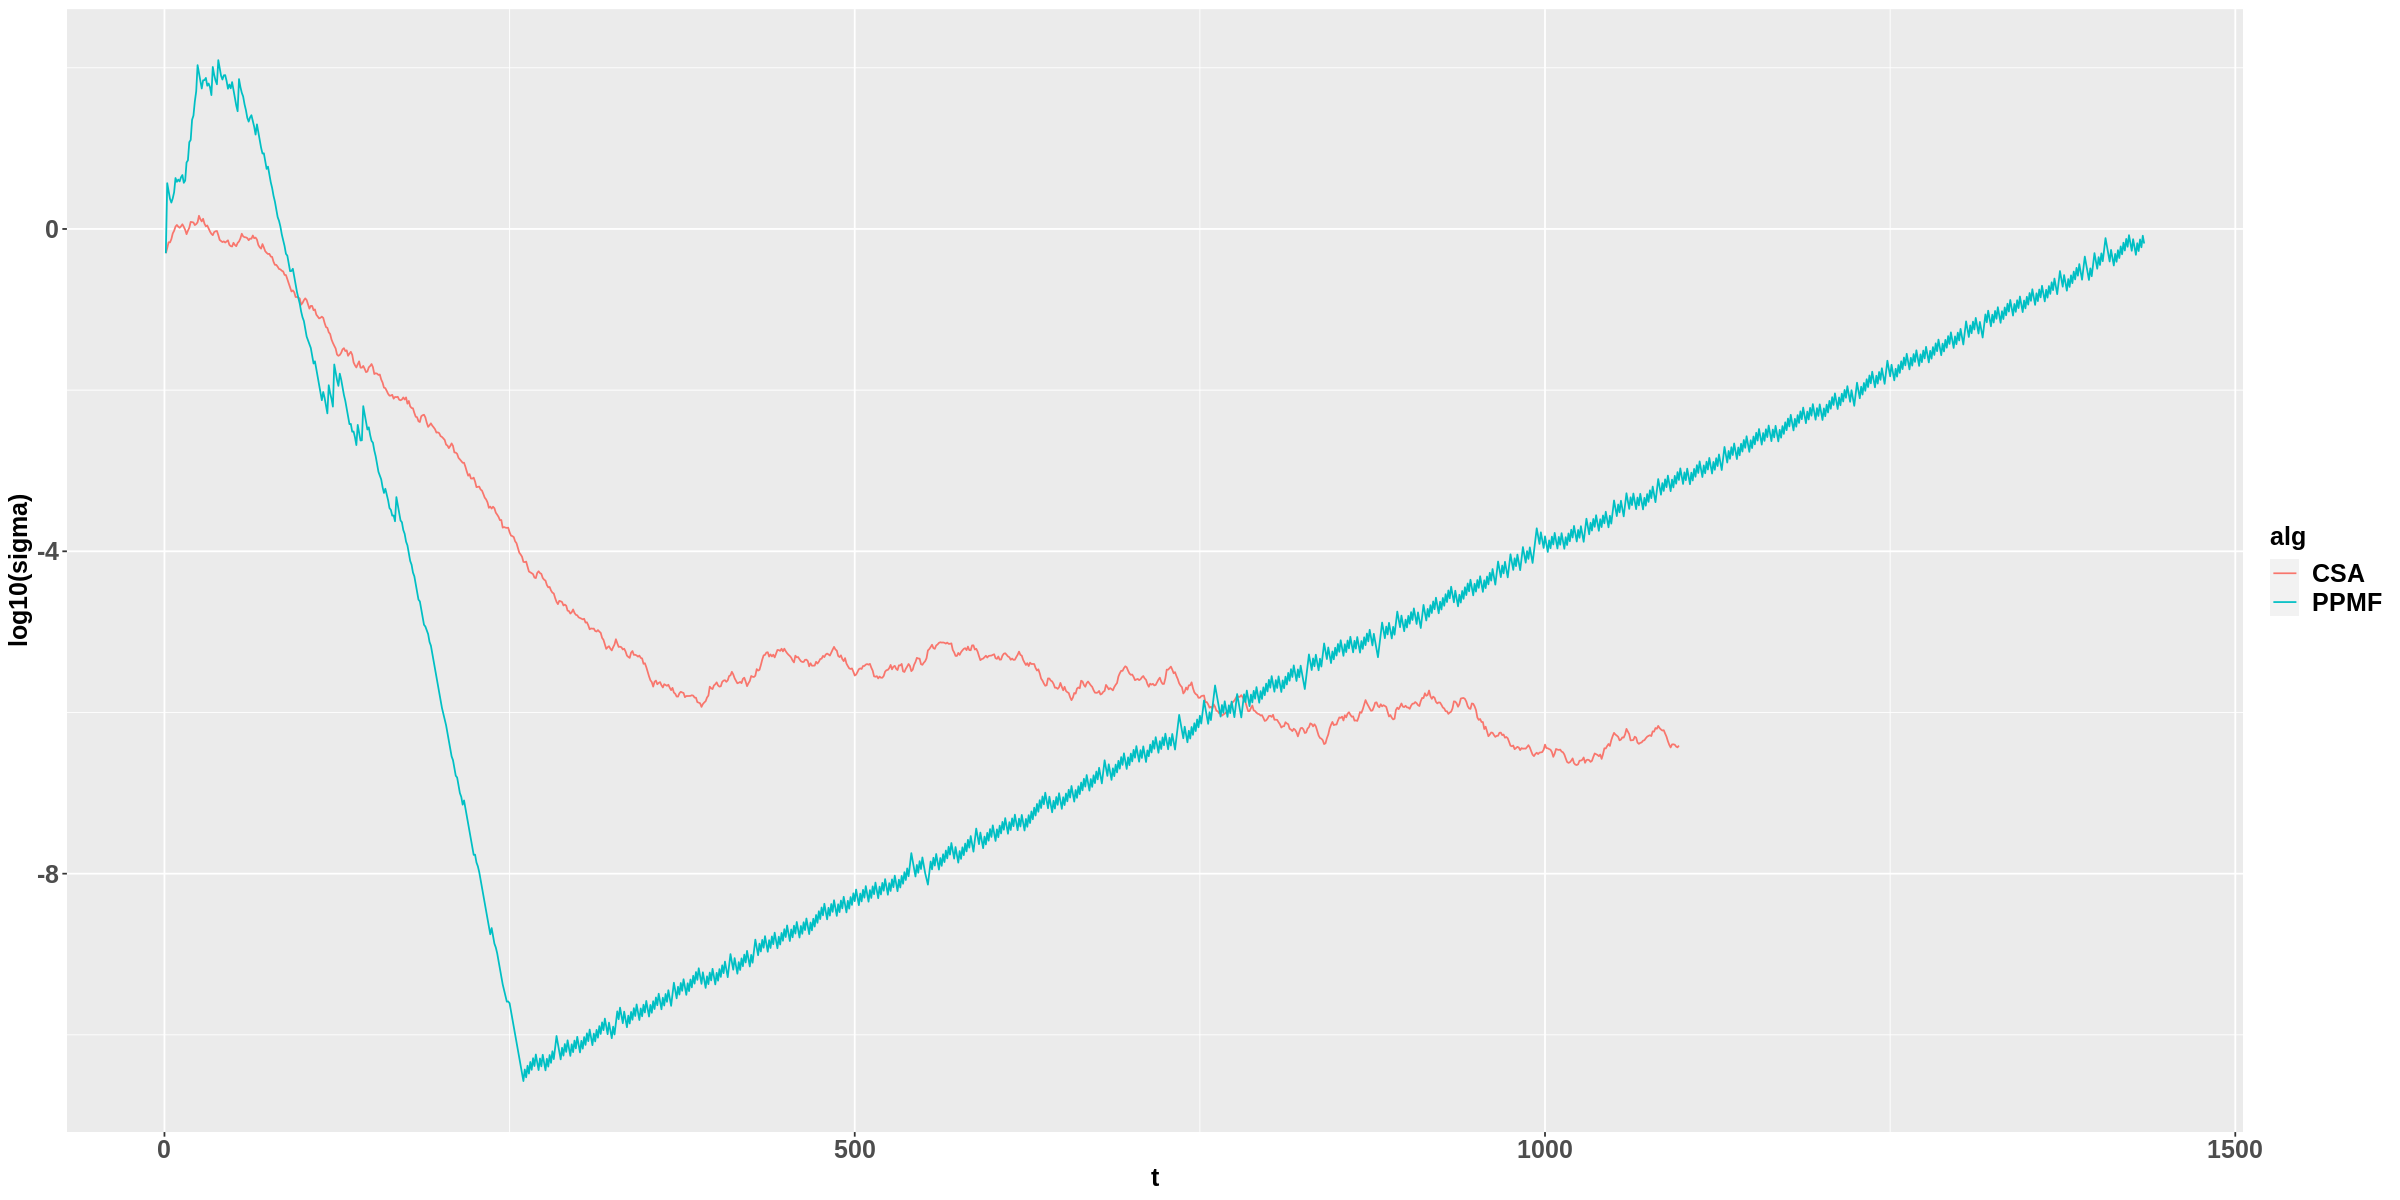

In [92]:
sigma_all %>%
  ggplot2::ggplot(aes(x = t, y = log10(sigma), col = alg)) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  

# Conv rate

In [93]:
csa_sigma =
  diagnostic_data(csa_res$diagnostic, "bestVal", "CSA")
ppmf_sigma = 
  diagnostic_data(ppmf_res$diagnostic, "bestVal", "PPMF")
best_all = 
  dplyr::bind_rows(csa_sigma, ppmf_sigma)

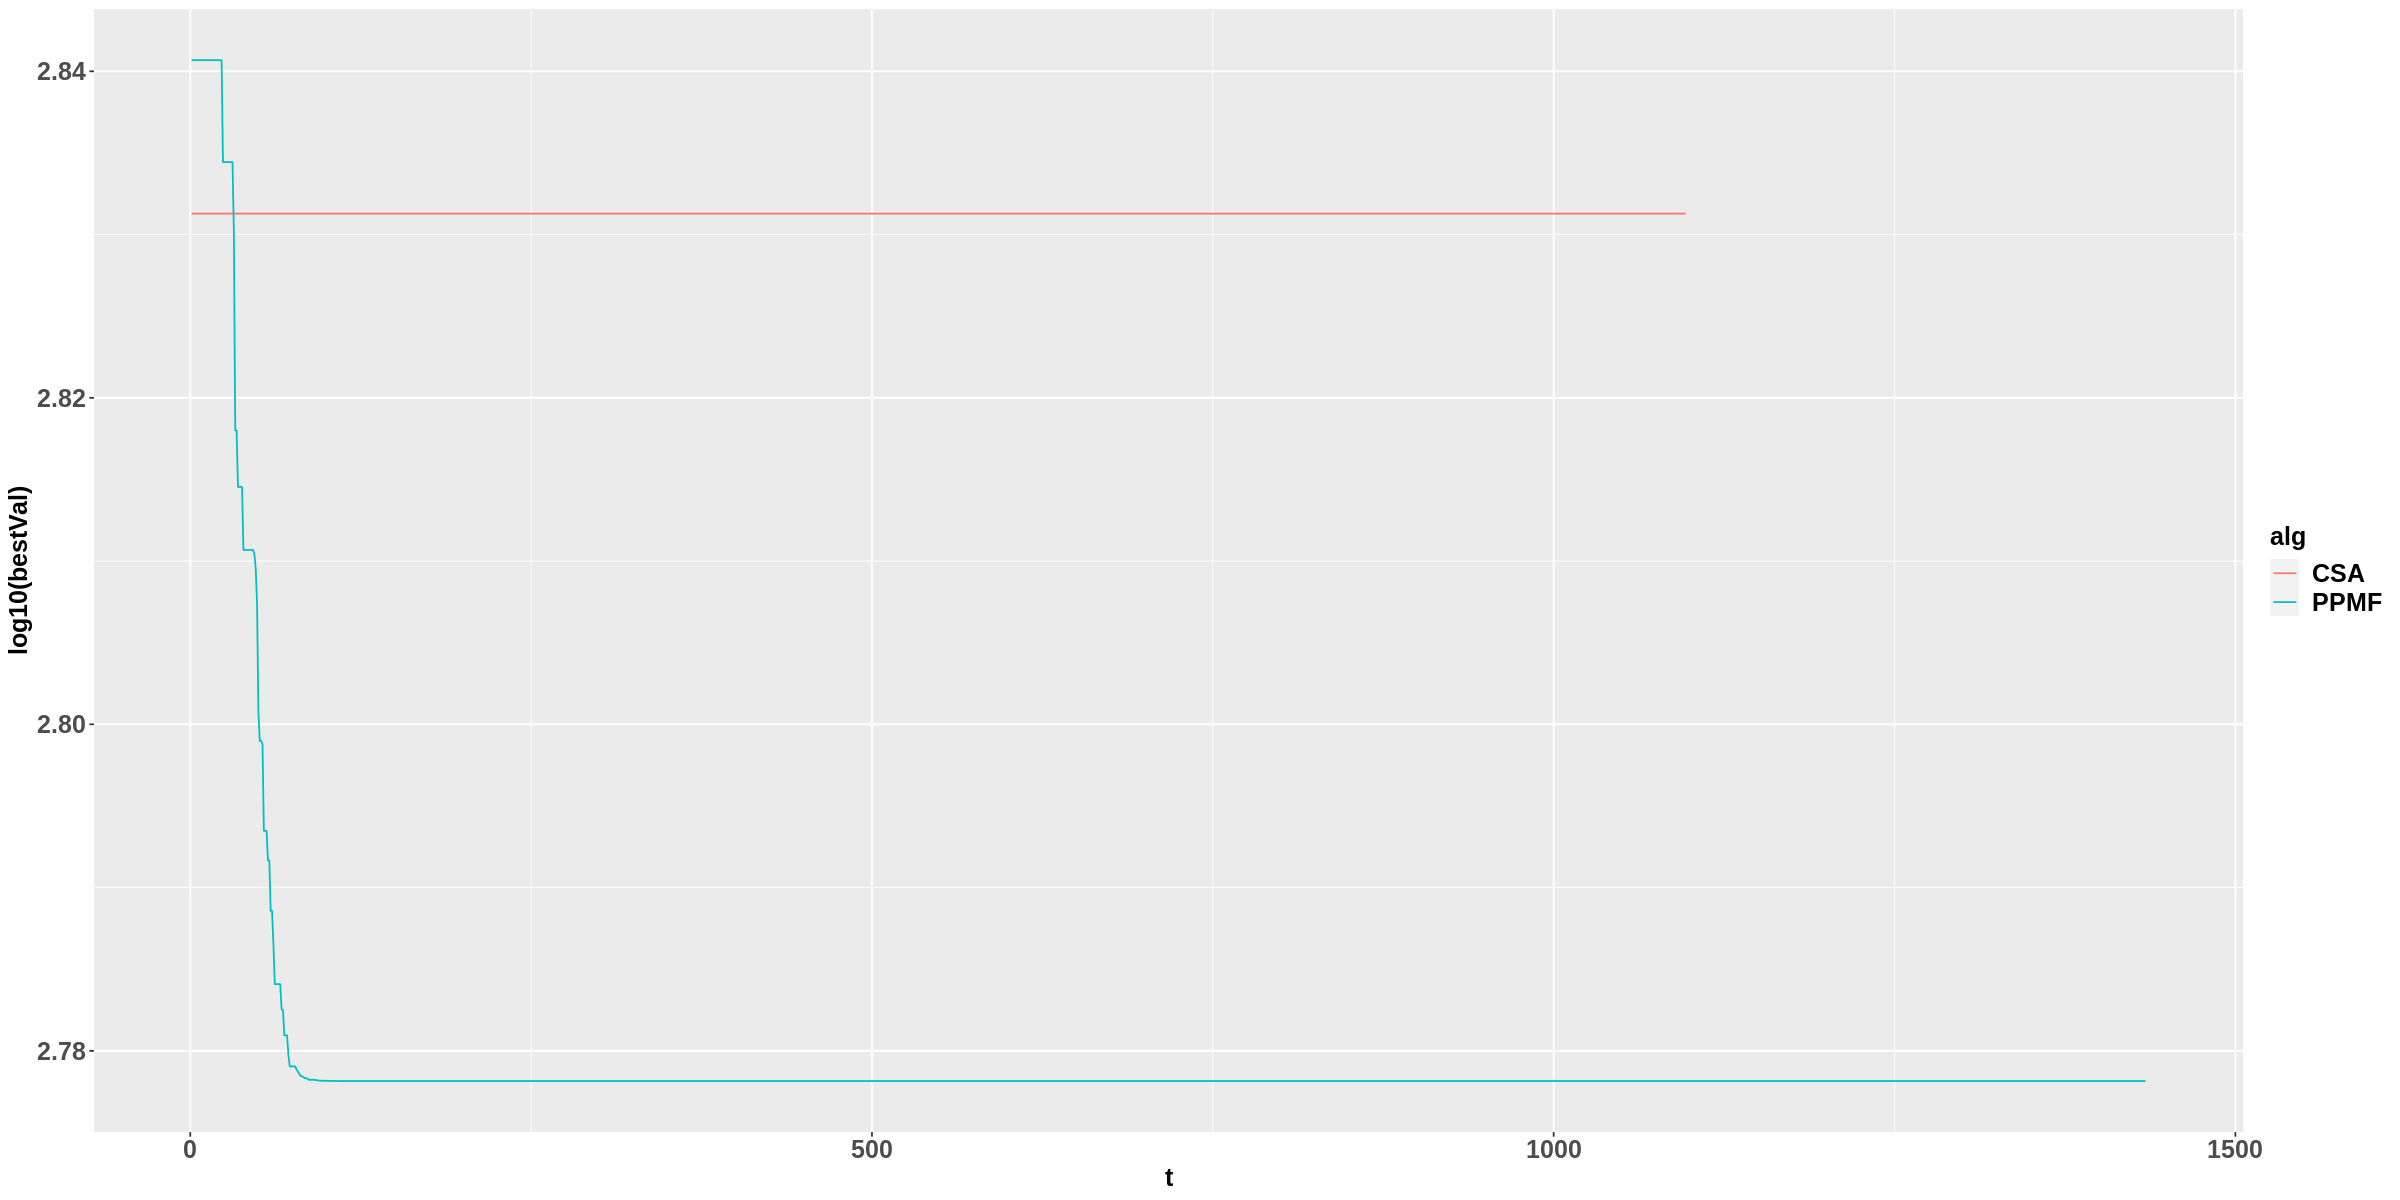

In [94]:
best_all %>%
  ggplot2::ggplot(aes(x = t, y = log10(bestVal), col = alg)) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  

# D30

In [100]:
csa_res50 = 
  csa_alg(rep(100, 30), fn = function(x) eval(x), lower = -100, upper = 100)

In [121]:
csa_res50$diagnostic %>% names()
csa_res50$value
csa_res50$convergence
csa_res50$constr.violations

[1] "value"   "sigma"   "eigen"   "pop"     "bestVal"

[1] 600

[1] 0

[1] 7313

In [102]:
ppmf_res50 = 
  ppmf_alg(rep(100, 30), fn = function(x) eval(x), lower = -100, upper = 100)

In [122]:
ppmf_res50$diagnostic %>% names()
ppmf_res50$value
ppmf_res50$convergence
ppmf_res50$constr.violations

[1] "value"   "sigma"   "eigen"   "pop"     "bestVal"

[1] 748.6184

[1] 0

[1] 82993

In [124]:
ppmf_res50$diagnostic$pop[,,100]
                          

94.53458,94.46263,94.65394,94.11933,94.88037,94.69045,94.51624,94.38427,94.48651,94.42215,⋯,94.39842,94.36582,94.71943,94.40966,94.45248,94.32092,94.44249,94.58192,94.26736,94.38823
99.71090,99.90461,99.95930,99.81520,99.79834,99.81293,99.84318,99.85538,99.96193,99.88692,⋯,99.76822,99.96577,99.68744,99.84957,99.79755,99.89615,99.91843,99.72097,99.63019,99.89941
99.21339,99.96331,99.70764,99.71174,99.70983,99.53750,99.84014,99.93256,99.70182,99.73774,⋯,99.80582,99.54176,99.85952,99.77427,99.80740,99.63207,99.57896,99.59691,99.55661,99.75722
99.88438,99.76526,99.69644,99.90487,99.93659,99.78409,99.99624,99.91870,99.68812,99.81633,⋯,99.74684,99.95949,99.83890,100.00197,99.73998,99.68055,99.72846,99.77284,99.50696,99.86818
86.19918,86.80979,86.53295,87.06539,87.21696,86.49976,86.95516,86.77072,87.33424,87.30543,⋯,86.83660,87.49927,86.81380,87.31680,87.19308,87.46366,87.25891,86.94155,87.26313,87.57080
93.65124,93.36976,93.82613,93.76544,93.49880,93.48425,93.34442,93.41632,93.72723,93.42123,⋯,93.78292,93.53491,93.37399,93.69142,93.60646,93.41938,93.50931,93.49958,93.87446,93.43462
97.80601,98.21637,98.04362,98.04417,98.32189,98.01555,98.16911,98.22930,98.23388,98.28835,⋯,98.15043,97.91604,98.30050,98.38109,98.17853,97.55135,98.18688,98.24208,97.86534,98.14048
88.44938,88.72856,88.47861,88.86625,88.57924,88.69759,88.48739,88.68826,88.71822,88.68111,⋯,88.73673,88.61983,88.80341,88.81521,88.73868,88.56020,88.88274,88.65470,88.92293,88.61268
93.77179,93.45399,93.60653,93.71165,93.59858,93.71431,93.87274,93.52207,93.83360,93.48665,⋯,93.62935,93.45219,93.81885,93.82489,94.11646,93.40788,93.59101,93.96569,93.55406,93.95298
93.97911,94.60596,94.18521,94.28561,94.41848,94.56802,94.18108,94.36146,94.05871,94.50249,⋯,94.31465,94.46181,94.38831,94.30259,94.12107,94.17707,94.47186,94.12195,94.37119,93.96071
88.59824,88.15690,88.25833,88.42857,88.03892,88.19604,88.53753,88.13055,88.40628,88.12770,⋯,88.18975,88.85783,88.39060,88.21272,88.17170,88.83738,88.35310,88.19353,88.82066,88.28806


In [123]:
csa_res50$diagnostic$pop[,,100]

80.463927,86.378409,86.832025,86.058490,68.283513,88.195214,79.0126817,88.683592,86.478120,71.185579,⋯,74.639619,83.960086,78.634577,84.949218,68.485025,76.401865,82.593760,71.493106,91.24449847,76.823424
-20.004411,-21.270984,-31.702994,-19.812878,-21.870441,-19.096330,-20.4818671,-10.551135,-28.334810,-32.260137,⋯,-19.766805,-24.987777,-29.079381,-28.186908,-17.450167,-13.540650,-20.522519,-9.206633,-18.14368081,-24.140736
-44.358151,-38.386195,-28.280017,-36.222352,-42.897411,-36.025286,-40.8386275,-23.777289,-45.769658,-38.696400,⋯,-24.541011,-40.325544,-35.612549,-33.120191,-37.606265,-27.526759,-30.245212,-22.160092,-39.62406030,-20.736621
-44.680437,-44.930818,-41.191693,-46.516992,-53.566197,-44.523907,-39.9314068,-49.343870,-41.319404,-44.193605,⋯,-50.333473,-42.691539,-33.679506,-46.019257,-58.637113,-44.158760,-51.282713,-41.241123,-52.54356917,-51.243283
77.794421,72.714253,66.199980,60.283325,67.889875,78.721060,64.4545918,62.642745,74.817586,70.479541,⋯,79.264123,74.841980,78.268350,81.220311,66.969128,75.026815,76.610109,61.764551,67.49059664,84.869346
15.959163,15.488316,17.840581,36.572356,20.351229,9.404469,32.2308614,13.195346,24.053426,31.668619,⋯,17.932888,23.223958,9.713514,2.257400,15.118960,8.676295,28.363597,32.143171,17.95807256,18.477880
-31.555827,-23.437462,-11.407692,-19.688509,-33.727838,-22.219935,-26.9654561,-14.507805,-29.033787,-18.088621,⋯,-42.882447,-28.305136,-22.771133,-29.385501,-24.357972,-29.964116,-44.299439,-32.650376,-24.00622072,-29.767005
-1.636280,-2.802702,3.724123,-1.320348,6.419861,2.824652,-7.2140310,-4.493406,11.529083,-4.609978,⋯,-1.996041,-7.599769,-15.492748,-2.983951,-7.446046,9.219842,-2.973190,4.213489,-4.82649199,-6.085417
73.917109,68.214702,66.432312,74.995745,64.040432,65.126361,59.6631678,52.513085,42.539793,64.665049,⋯,58.171728,57.618908,52.287094,66.727547,68.666569,62.509634,56.253886,58.295106,63.06917308,67.695385
47.028499,57.925341,41.033561,47.518310,46.564749,49.518373,35.1707532,44.568062,44.866950,47.867848,⋯,47.534877,38.498166,43.358565,56.400252,37.987787,53.224461,50.503926,45.648912,52.42181057,48.867384
57.995754,58.350729,52.055658,43.532303,57.893640,58.923391,56.5897583,53.503932,67.389045,57.864218,⋯,75.239112,60.937043,51.100971,49.179620,45.677975,57.207504,57.179344,64.551089,54.23613389,63.346412


# Sigma 

In [104]:
csa_sigma50 =
  diagnostic_data(csa_res50$diagnostic, "sigma", "CSA")

In [105]:
ppmf_sigma50 = 
  diagnostic_data(ppmf_res50$diagnostic, "sigma", "PPMF")

In [106]:
sigma_all50 = 
  dplyr::bind_rows(csa_sigma50, ppmf_sigma50)

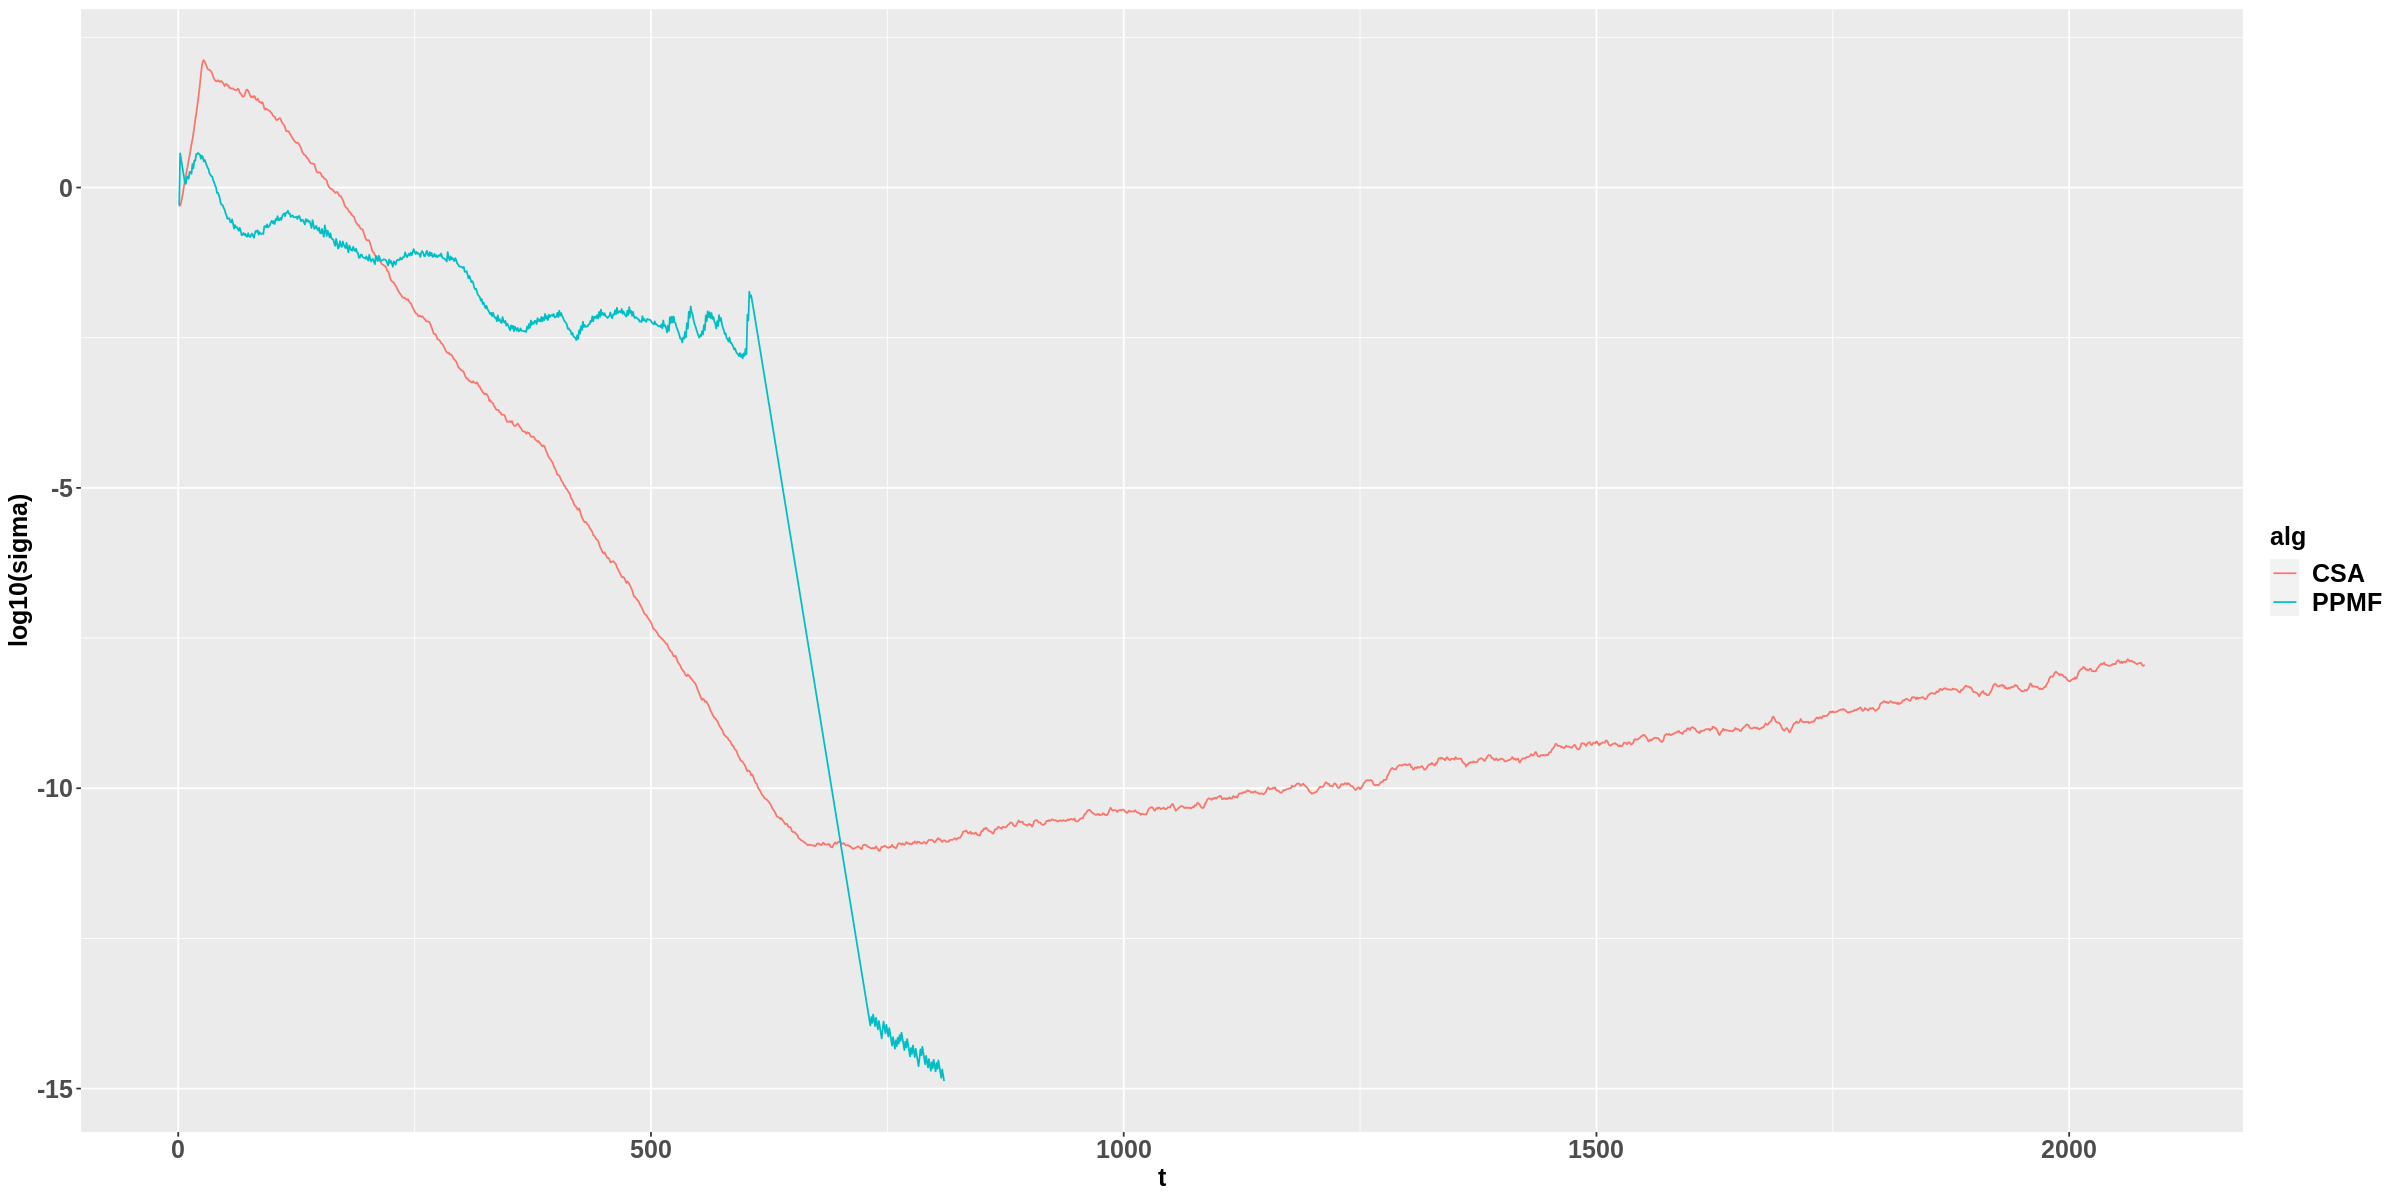

In [107]:
sigma_all50 %>%
  ggplot2::ggplot(aes(x = t, y = log10(sigma), col = alg)) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  

# Conv rate

In [108]:
csa_sigma50 =
  diagnostic_data(csa_res50$diagnostic, "bestVal", "CSA")
ppmf_sigma50 = 
  diagnostic_data(ppmf_res50$diagnostic, "bestVal", "PPMF")
best_all50 = 
  dplyr::bind_rows(csa_sigma50, ppmf_sigma50)

Warning message:
“Removed 1690 row(s) containing missing values (geom_path).”


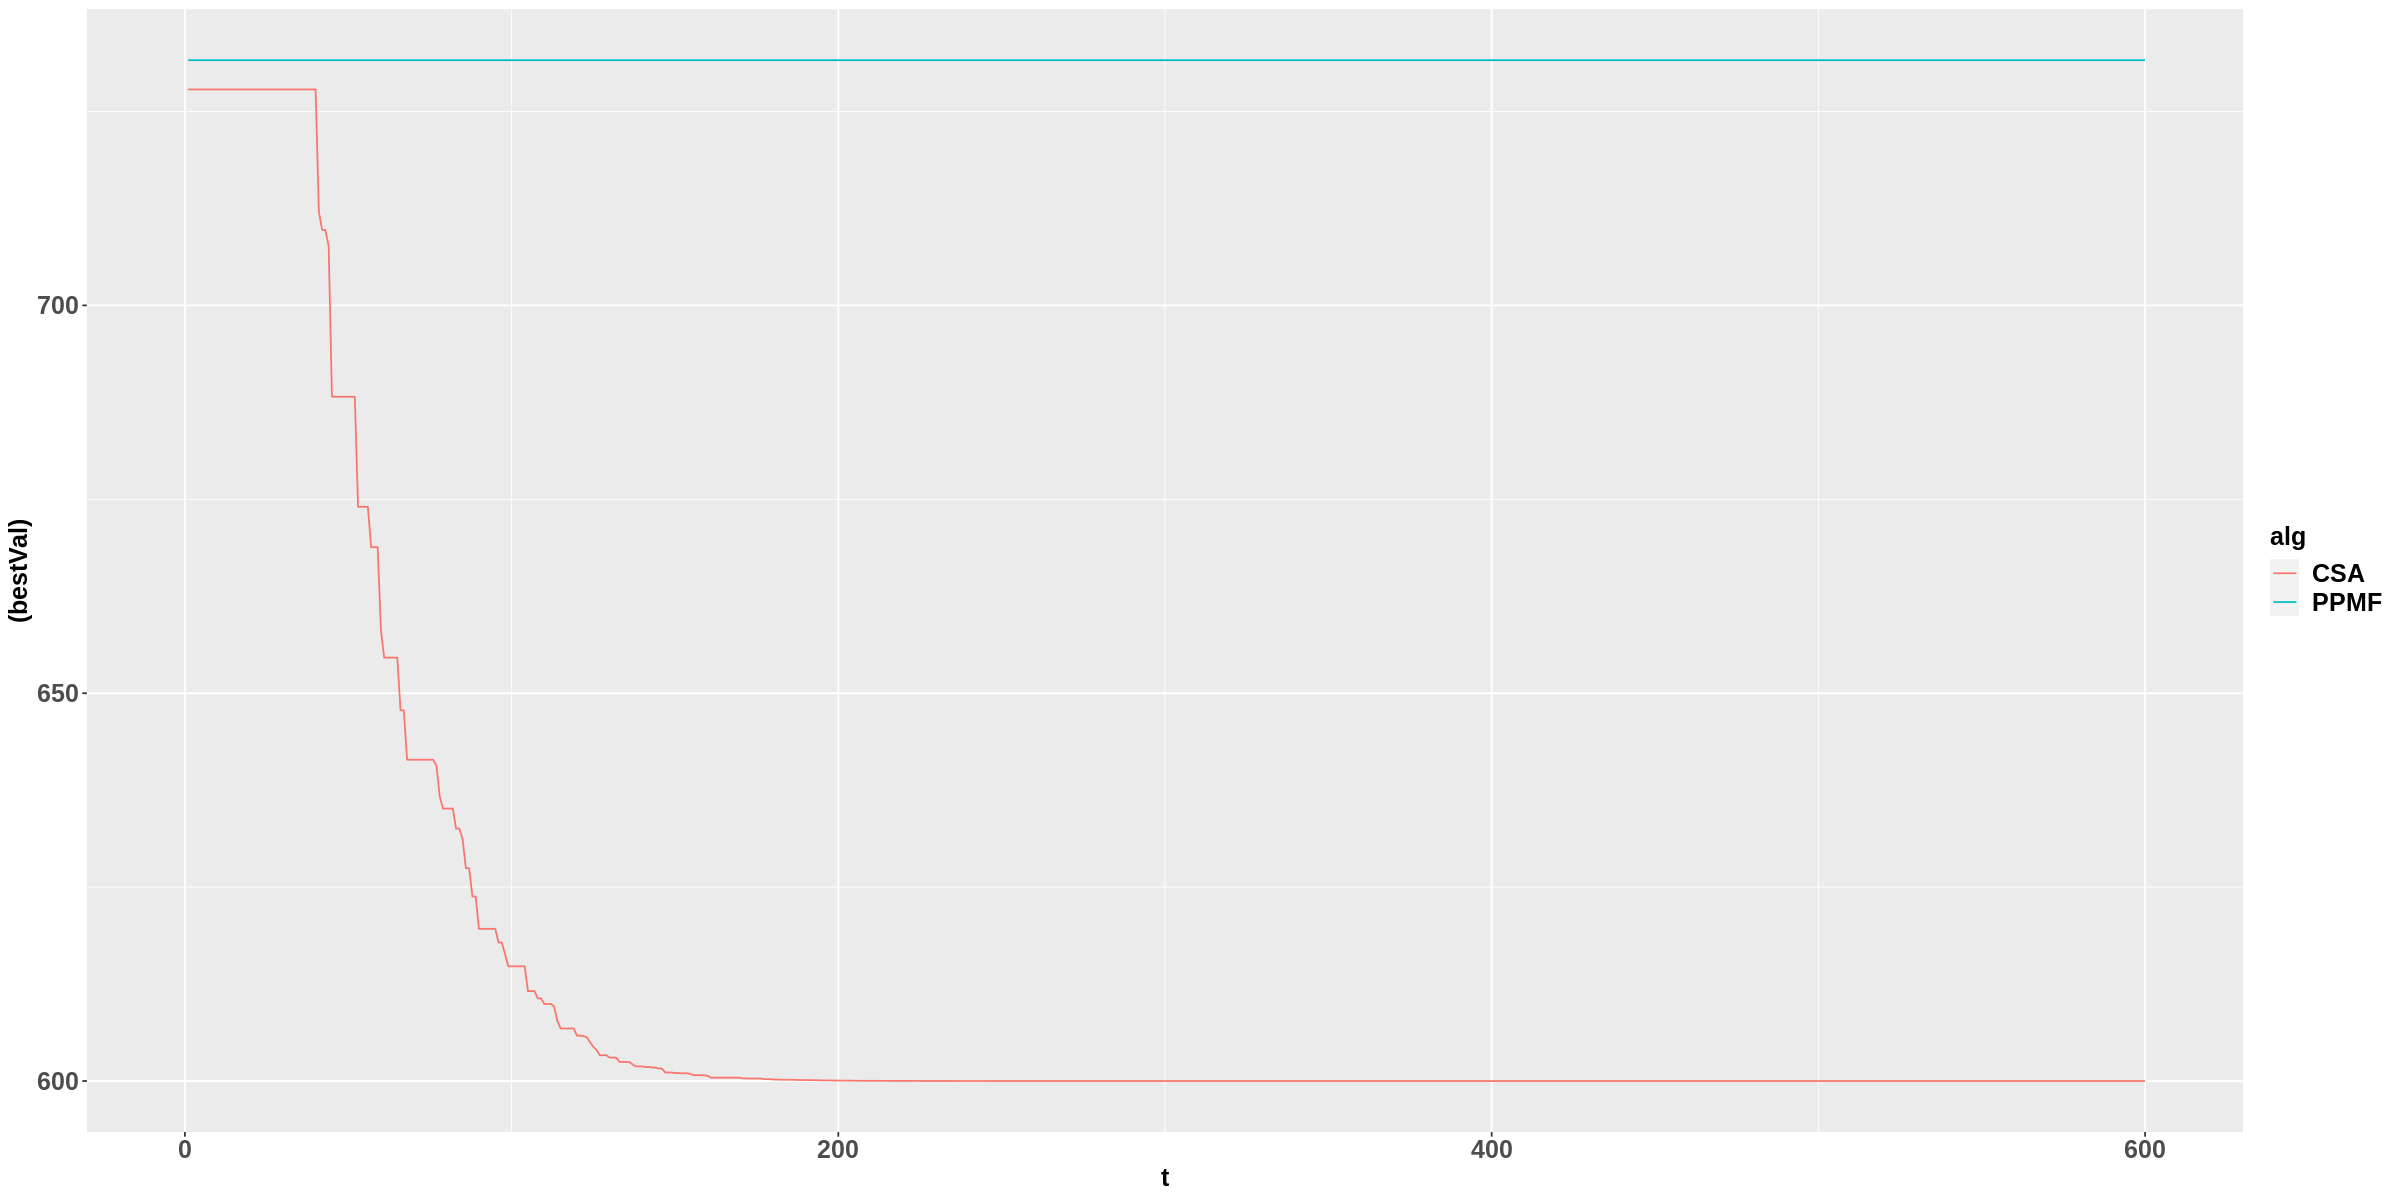

In [125]:
best_all50 %>%
  ggplot2::ggplot(aes(x = t, y = (bestVal), col = alg)) + 
  xlim(0, 600) +
  ggplot2::geom_line() +
  ggplot2::theme(
      axis.title = ggplot2::element_text(size = 15, face = "bold"),
      axis.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.text = ggplot2::element_text(size = 15, face = "bold"),
      legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
  